<a href="https://colab.research.google.com/github/PaulaLuana/deep-learning-exercises/blob/master/exercicio_rnn_k_fold_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

**Adding white-noise channels or all-zeros channels to MNIST**

Questão 1) Na célula abaixo, a variável **train_images_with_zeros_channels** representa um dataset gerado a partir das imagens inciais, com um canal de cor completamente zero. Complete o código da célula abaixo para que a variável **train_images_with_noise_channels**, da mesma forma que **train_images_with_zeros_channels** tenha mais um canal de cor, entretanto os valores devem ser gerados randomicamente. Essas duas variáveis representaão as imagens com atributos com alguma esécie de ruído.

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

Questão 2) Complemente o código abaixo para definir um modelo sequencial com duas camadas totalmente conectadas. A primeira com 512 unidades com ativação ReLU, a segunda é uma camada de saída com a função Softmax para o conjunto de classes do problema em questão. Treine o modelo com as imagens com canal de cor gerado aleatoriamente utilizando  10 épocas, 20% do treino para validação e batch_size de tamanho 128.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [6]:
train = train_images_with_noise_channels[:int(0.8 * len(train_images))]
validation = train_images_with_noise_channels[int(0.8 * len(train_images)):]

In [7]:
partial_x_train = train[:,:-1]
partial_y_train = train[:,-1]
x_val = validation[:,:-1]
y_val = validation[:,-1]

In [8]:
model = get_model()
history_noise = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 11s 27ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
375/375 [=============================

In [9]:
partial_y_train

array([0.33929876, 0.96557781, 0.85332235, ..., 0.56977633, 0.90084945,
       0.95906552])

Questão 3) Obtenha um novo modelo e treine com os mesmos parâmetros da questão anterior utilizando as imagens com canal de cor zerado. 

In [10]:
def get_model():
    model = keras.Sequential([
        layers.Dense(64, activation="linear"),
        layers.Dense(64, activation="linear"),
        layers.Dense(10, activation="relu"),
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [11]:
train = train_images_with_zeros_channels[:int(0.8 * len(train_images))]
validation = train_images_with_zeros_channels[int(0.8 * len(train_images)):]

In [12]:
partial_x_train = train[:,:-1]
partial_y_train = train[:,-1]
x_val = validation[:,:-1]
y_val = validation[:,-1]

In [13]:
model = get_model()
history_zeros = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0326 - accuracy: 0.9976 - val_loss: 9.5401e-07 - val_accuracy: 1.0000
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 9.5378e-07 - accuracy: 1.0000 - val_loss: 9.5377e-07 - val_accuracy: 1.0000
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 9.5371e-07 - accuracy: 1.0000 - val_loss: 9.5373e-07 - val_accuracy: 1.0000
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 9.5369e-07 - accuracy: 1.0000 - val_loss: 9.5369e-07 - val_accuracy: 1.0000
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 9.5368e-07 - accuracy: 1.0000 - val_loss: 9.5369e-07 - val_accuracy: 1.0000
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 9.5368e-07 - accuracy: 1.0000 - val_loss: 9.5369e-07 - val_accuracy: 1.0000
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 9.5368e-07 - accuracy: 1.0000 

**Plotting a validation accuracy comparison**

Questão 4) Plot em um único gráfico as curvas da acurácia dos modelos treinados anteriormente. Avalie o efeito dos modelos treinados com os novos canais de cor (zero e com ruído aletório).

In [14]:
import matplotlib.pyplot as plt

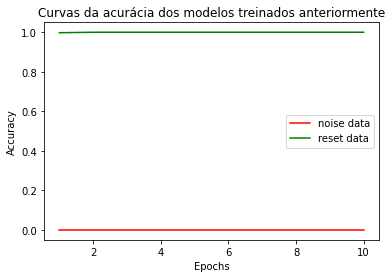

In [15]:
acc1 = history_noise.history["accuracy"]
acc2 = history_zeros.history["accuracy"]
epochs = range(1, len(acc1) + 1)
plt.plot(epochs, acc1, "b", label="noise data", color='red')
plt.plot(epochs, acc2, "b", label="reset data", color='green')
plt.title("Curvas da acurácia dos modelos treinados anteriormente")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Fitting a MNIST model with randomly shuffled labels**

Questão 5) Altere a célula a seguir para que as labels utilizadas para treino sejam o resultado de uma permutação aleatória das labels dos dados originais. Treine o modelo e valie o resultado do treinamento utilizando essas labels. Plot os gráficos de acurácia para treino e validação. Como se comportou a acurácia nos dados de treino e de validação? O que isso nos sugere?

In [16]:
import random as random

In [17]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [18]:
train_images.shape

(60000, 784)

In [19]:
random_train_labels = train_labels.copy()
random.shuffle(random_train_labels)

In [20]:
random_train_labels

array([4, 0, 9, ..., 7, 5, 2], dtype=uint8)

In [21]:
x_train = train_images[:int(0.8 * len(train_images))]
x_val = train_images[int(0.8 * len(train_images)):]
y_train = random_train_labels[:int(0.8 * len(train_images))]
y_val = random_train_labels[int(0.8 * len(train_images)):]


In [22]:
train.shape

(48000, 1568)

In [23]:
def get_model():
    model = keras.Sequential([
        layers.Dense(64, activation="linear"),
        layers.Dense(64, activation="linear"),
        layers.Dense(10, activation="softmax"),
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [24]:
model = get_model()
history_labels_random = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3327 - accuracy: 0.1023 - val_loss: 2.3098 - val_accuracy: 0.1068
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3053 - accuracy: 0.1105 - val_loss: 2.3046 - val_accuracy: 0.1104
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3031 - accuracy: 0.1119 - val_loss: 2.3117 - val_accuracy: 0.1025
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1148 - val_loss: 2.3094 - val_accuracy: 0.1090
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2993 - accuracy: 0.1185 - val_loss: 2.3090 - val_accuracy: 0.1098
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2982 - accuracy: 0.1197 - val_loss: 2.3082 - val_accuracy: 0.1085
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2965 - accuracy: 0.1213 - val_loss: 2.3116 - val_accuracy: 0.1030
Epoch 

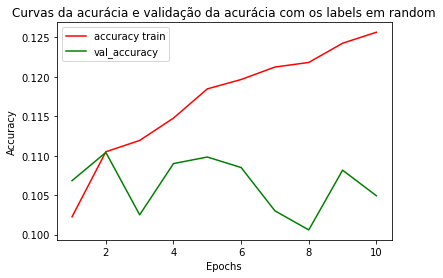

In [25]:
acc = history_labels_random.history["accuracy"]
val_acc = history_labels_random.history["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "b", label="accuracy train", color='red')
plt.plot(epochs, val_acc, "b", label="val_accuracy", color='green')
plt.title("Curvas da acurácia e validação da acurácia com os labels em random")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Questão 6) Treine e valide o modelo aplicando o método k-fold cross validation para as seguintes configurações de parâmetros das camadas ocultas. 



*   1 camada densa com 512 unidades
*   1 camada densa com 256 un1dades
*   2 camadas densas uma com 512 unidades e outra com 128 unidades
*    2 camadas densas uma com 256 unidades e outra com 128 unidades






In [26]:
from sklearn.model_selection import KFold


In [27]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

**1 camada densa com 512 unidades**

In [28]:
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=5)

In [29]:
inputs = train_images.copy()
targets = train_labels.copy()

In [30]:
fold_no = 1
for train, test in kfold.split(inputs, targets):

  model = keras.Sequential([
        layers.Dense(512, activation="linear"),
        layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=300,
              epochs=10)
  

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
160/160 [==============================] - 3s 16ms/step - loss: 0.4501 - accuracy: 0.8662
Epoch 2/10
160/160 [==============================] - 3s 16ms/step - loss: 0.3184 - accuracy: 0.9086
Epoch 3/10
160/160 [==============================] - 2s 15ms/step - loss: 0.3051 - accuracy: 0.9135
Epoch 4/10
160/160 [==============================] - 2s 15ms/step - loss: 0.2911 - accuracy: 0.9173
Epoch 5/10
160/160 [==============================] - 2s 15ms/step - loss: 0.2867 - accuracy: 0.9194
Epoch 6/10
160/160 [==============================] - 2s 15ms/step - loss: 0.2805 - accuracy: 0.9209
Epoch 7/10
160/160 [==============================] - 2s 15ms/step - loss: 0.2756 - accuracy: 0.9235
Epoch 8/10
160/160 [==============================] - 2s 15ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 9/10
160/160 [==============================] - 2s 15ms/step - loss: 0.2697 - accuracy: 0

**1 camada densa com 256 unidades**

In [31]:
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=5)

In [32]:
fold_no = 1
for train, test in kfold.split(inputs, targets):

  model = keras.Sequential([
        layers.Dense(256, activation="linear"),
        layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=300,
              epochs=10)
  

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
160/160 [==============================] - 2s 9ms/step - loss: 0.4524 - accuracy: 0.8708
Epoch 2/10
160/160 [==============================] - 2s 10ms/step - loss: 0.3087 - accuracy: 0.9116
Epoch 3/10
160/160 [==============================] - 2s 10ms/step - loss: 0.2921 - accuracy: 0.9174
Epoch 4/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2849 - accuracy: 0.9198
Epoch 5/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2776 - accuracy: 0.9222
Epoch 6/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2738 - accuracy: 0.9236
Epoch 7/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2712 - accuracy: 0.9244
Epoch 8/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2665 - accuracy: 0.9259
Epoch 9/10
160/160 [==============================] - 1s 9ms/step - loss: 0.2652 - accuracy: 0.9256
E

**2 camadas densas uma com 512 unidades e outra com 128 unidades**

In [33]:
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=5)

In [34]:
fold_no = 1
for train, test in kfold.split(inputs, targets):

  model = keras.Sequential([
        layers.Dense(512, activation="linear"),
        layers.Dense(512, activation="linear"),
        layers.Dense(128, activation="linear"),
        layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=300,
              epochs=10)
  

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
160/160 [==============================] - 5s 28ms/step - loss: 0.5306 - accuracy: 0.8440
Epoch 2/10
160/160 [==============================] - 5s 28ms/step - loss: 0.4021 - accuracy: 0.8810
Epoch 3/10
160/160 [==============================] - 5s 28ms/step - loss: 0.3674 - accuracy: 0.8926
Epoch 4/10
160/160 [==============================] - 4s 28ms/step - loss: 0.3452 - accuracy: 0.9001
Epoch 5/10
160/160 [==============================] - 4s 28ms/step - loss: 0.3311 - accuracy: 0.9040
Epoch 6/10
160/160 [==============================] - 4s 28ms/step - loss: 0.3237 - accuracy: 0.9062
Epoch 7/10
160/160 [==============================] - 4s 27ms/step - loss: 0.3134 - accuracy: 0.9103
Epoch 8/10
160/160 [==============================] - 4s 27ms/step - loss: 0.3078 - accuracy: 0.9126
Epoch 9/10
160/160 [==============================] - 4s 28ms/step - loss: 0.3004 - accuracy: 0

**2 camadas densas uma com 256 unidades e outra com 128 unidades**

In [35]:
acc_per_fold = []
loss_per_fold = []
kfold = KFold(n_splits=5)

In [36]:
fold_no = 1
for train, test in kfold.split(inputs, targets):

  model = keras.Sequential([
        layers.Dense(256, activation="linear"),
        layers.Dense(256, activation="linear"),
        layers.Dense(128, activation="linear"),
        layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=300,
              epochs=10)
  

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
160/160 [==============================] - 3s 14ms/step - loss: 0.4852 - accuracy: 0.8547
Epoch 2/10
160/160 [==============================] - 2s 14ms/step - loss: 0.3596 - accuracy: 0.8943
Epoch 3/10
160/160 [==============================] - 2s 14ms/step - loss: 0.3391 - accuracy: 0.9023
Epoch 4/10
160/160 [==============================] - 2s 14ms/step - loss: 0.3269 - accuracy: 0.9051
Epoch 5/10
160/160 [==============================] - 2s 14ms/step - loss: 0.3179 - accuracy: 0.9087
Epoch 6/10
160/160 [==============================] - 2s 14ms/step - loss: 0.3087 - accuracy: 0.9107
Epoch 7/10
160/160 [==============================] - 2s 14ms/step - loss: 0.3026 - accuracy: 0.9126
Epoch 8/10
160/160 [==============================] - 2s 14ms/step - loss: 0.2982 - accuracy: 0.9146
Epoch 9/10
160/160 [==============================] - 2s 13ms/step - loss: 0.2948 - accuracy: 0